In [499]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [500]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [501]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup


In [502]:
reviewlist = []


In [503]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [504]:
reviewlist = []


In [505]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [506]:
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)

    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [507]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,It's good but not over the top.,"So, I am reviewing it after using this device ...",24 November 2022
1,4.0,Ok,Camera quality improve,24 November 2022
2,4.0,After 6 months of use,After the six months of use i would like to sa...,4 November 2022
3,4.0,Decent Specs at 20k budget,"Like: Battery even after heavy use, lasts for ...",20 November 2022
4,4.0,Good product,Good product,29 November 2022
...,...,...,...,...
1085,3.0,One plus in this affordable price range.. very...,May be hang once a day....Camera quality also ...,22 June 2022
1086,5.0,Awesome phone,I like the product very much after using it fo...,12 June 2022
1087,5.0,"Nice phone light weight,",Very nice phone 1+,1 August 2022
1088,5.0,Smooth phone,Good product,4 August 2022


In [508]:
!pip install textblob

In [509]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [629]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [630]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming

True

In [631]:
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0','Review_Date'],inplace=True,axis=1)
reviews

,Rating,Title,Review
0,4.0,It's good but not over the top.,"So, I am reviewing it after using this device ..."
1,4.0,Ok,Camera quality improve
2,4.0,After 6 months of use,After the six months of use i would like to sa...
3,4.0,Decent Specs at 20k budget,"Like: Battery even after heavy use, lasts for ..."
4,4.0,Good product,Good product
...,...,...,...
1085,3.0,One plus in this affordable price range.. very...,May be hang once a day....Camera quality also ...
1086,5.0,Awesome phone,I like the product very much after using it fo...
1087,5.0,"Nice phone light weight,",Very nice phone 1+
1088,5.0,Smooth phone,Good product


In [632]:
reviews.Rating.describe()


count    1090.000000
mean        4.255963
std         0.733300
min         2.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [633]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,"So, I am reviewing it after using this device ...",52
1,Camera quality improve,3
2,After the six months of use i would like to sa...,100
3,"Like: Battery even after heavy use, lasts for ...",33
4,Good product,2


In [634]:
reviews['char_count'] = reviews['Review'].str.len() 
reviews[['Review','char_count']].head()

,Review,char_count
0,"So, I am reviewing it after using this device ...",288.0
1,Camera quality improve,22.0
2,After the six months of use i would like to sa...,491.0
3,"Like: Battery even after heavy use, lasts for ...",210.0
4,Good product,12.0


In [635]:
def avg_word(sentence):
    words = str(sentence).split()
    return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,"So, I am reviewing it after using this device ...",4.557692
1,Camera quality improve,6.666667
2,After the six months of use i would like to sa...,3.920000
3,"Like: Battery even after heavy use, lasts for ...",5.393939
4,Good product,5.500000


In [636]:
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,"So, I am reviewing it after using this device ...",26
1,Camera quality improve,0
2,After the six months of use i would like to sa...,43
3,"Like: Battery even after heavy use, lasts for ...",12
4,Good product,0


In [637]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,"So, I am reviewing it after using this device ...",0
1,Camera quality improve,0
2,After the six months of use i would like to sa...,0
3,"Like: Battery even after heavy use, lasts for ...",0
4,Good product,0


In [638]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,"So, I am reviewing it after using this device ...",1
1,Camera quality improve,0
2,After the six months of use i would like to sa...,1
3,"Like: Battery even after heavy use, lasts for ...",0
4,Good product,0


In [639]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,"So, I am reviewing it after using this device ...",2
1,Camera quality improve,0
2,After the six months of use i would like to sa...,0
3,"Like: Battery even after heavy use, lasts for ...",0
4,Good product,0


In [640]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','hashtags','upper'],axis=1,inplace=True)


# Spelling correction

In [641]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))


0    To, I am reviewing it after using this device ...
1                               Camera quality improve
2    After the six months of use i would like to sa...
3    Like: Battery even after heavy use, lasts for ...
4                                         Good product
Name: Review, dtype: object

# Data Visualization

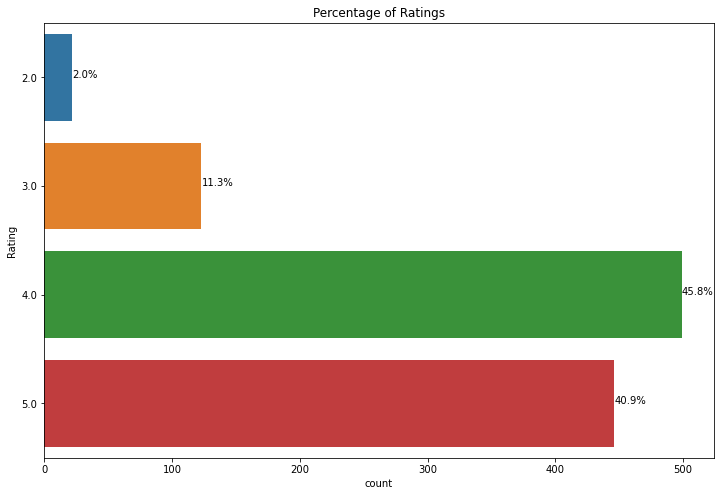

In [642]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# Sentiment Analysis

In [533]:
data = df[['Review']]
data

,Review
0,"So, I am reviewing it after using this device ..."
1,Camera quality improve
2,After the six months of use i would like to sa...
3,"Like: Battery even after heavy use, lasts for ..."
4,Good product
...,...
1085,May be hang once a day....Camera quality also ...
1086,I like the product very much after using it fo...
1087,Very nice phone 1+
1088,Good product


In [534]:
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [535]:
data

,Review
0,"so, i reviewing using device 2 months. the per..."
1,camera quality improve
2,after six months use would like say good phone...
3,"like: battery even heavy use, lasts day. charg..."
4,good product
...,...
1085,may hang day....camera quality also good pro.....
1086,i like product much using 3 days. very much li...
1087,very nice phone 1+
1088,good product


In [536]:
stopwords = set(stopwords.words("english"))

In [537]:
import nltk 
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [538]:
lemmatizer = WordNetLemmatizer()
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/1090 [00:00<?, ?it/s]

In [539]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost

In [540]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product


# Text Pre-processing Techniques

In [541]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [542]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
8,,
9,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu..."


# Removing links (http | https)

In [543]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
8,,
9,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu..."


# Removing Review with empty text

In [544]:

dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
9,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu..."
10,nice,Nice


# Dropping duplicate rows

In [545]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
9,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu..."
10,nice,Nice


# Resetting index

In [546]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
8,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu..."
9,nice,Nice


# Removing Punctuations, Numbers and Special characters

In [547]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [548]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
8,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu..."
9,nice,Nice


# Function to remove emoji

In [549]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [550]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
8,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu..."
9,nice,Nice


In [551]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ...","[reviewing, using, device, month, performance,..."
1,camera quality improve,Camera quality improve,"[camera, quality, improve]"
2,six month use would like say good phone price ...,After the six months of use i would like to sa...,"[six, month, use, would, like, say, good, phon..."
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ...","[like, battery, even, heavy, use, last, day, c..."
4,good product,Good product,"[good, product]"
5,one plus budget phone,One plus budget phone,"[one, plus, budget, phone]"
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...,"[amazing, product, awesome, camera, quality, m..."
7,excellent except battery life,Excellent except battery life,"[excellent, except, battery, life]"
8,bloatwares oxygen o best display quality amazi...,"1.No bloatwares, oxygen OS is best2.Display Qu...","[bloatwares, oxygen, o, best, display, quality..."
9,nice,Nice,[nice]


In [552]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

# Removing Stop words

In [553]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [554]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [555]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ..."
1,camera quality improve,Camera quality improve
2,six month use would like say good phone price ...,After the six months of use i would like to sa...
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ..."
4,good product,Good product
5,one plus budget phone,One plus budget phone
6,amazing product awesome camera quality much no...,This is very amazing product. Awesome Camera q...
7,excellent except battery life,Excellent except battery life
8,bloatwares oxygen best display quality amazing...,"1.No bloatwares, oxygen OS is best2.Display Qu..."
9,nice,Nice


# Tokenize 'Clean_Reviews'

In [556]:
TextBlob(dataframe['Clean_Reviews'][1]).words


WordList(['camera', 'quality', 'improve'])

In [557]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [reviewing, using, device, month, performance,...
1                           [camera, quality, improve]
2    [six, month, use, would, like, say, good, phon...
3    [like, battery, even, heavy, use, last, day, c...
4                                      [good, product]
5                           [one, plus, budget, phone]
6    [amazing, product, awesome, camera, quality, m...
7                   [excellent, except, battery, life]
8    [bloatwares, oxygen, best, display, quality, a...
9                                               [nice]
Name: Clean_Reviews, dtype: object

# Converting words to Stemmer

In [558]:
stemmer = SnowballStemmer("english")


In [559]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review use devic month perform great howev iss...
1,camera qualiti improv
2,six month use would like say good phone price ...
3,like batteri even heavi use last day charg sup...
4,good product
...,...
1018,may hang day camera qualiti also good pro fing...
1019,like product much use day much light weight ph...
1020,nice phone
1021,good product


# Converting words to Lemma

In [560]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,reviewing using device month performance great...
1,camera quality improve
2,six month use would like say good phone price ...
3,like battery even heavy use last day charging ...
4,good product
...,...
1018,may hang day camera quality also good pro fing...
1019,like product much using day much light weight ...
1020,nice phone
1021,good product


# Basic Feature Extaction


In [561]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [562]:
print(cv.vocabulary_)


{'reviewing': 1395, 'using': 1758, 'device': 417, 'month': 1018, 'performance': 1179, 'great': 695, 'however': 771, 'issue': 825, 'twice': 1707, 'perform': 1178, 'rapidly': 1308, 'sound': 1548, 'quality': 1292, 'camera': 243, 'believe': 159, 'could': 362, 'better': 168, 'go': 663, 'budget': 218, 'improve': 786, 'six': 1507, 'use': 1750, 'would': 1847, 'like': 902, 'say': 1428, 'good': 668, 'phone': 1189, 'price': 1244, 'range': 1306, 'within': 1829, 'facing': 558, 'problem': 1254, 'sometime': 1540, 'many': 959, 'apps': 84, 'paytm': 1170, 'phonepe': 1196, 'etc': 510, 'get': 649, 'crashed': 368, 'opened': 1119, 'contact': 344, 'able': 0, 'save': 1425, 'well': 1813, 'cannot': 250, 'make': 953, 'call': 235, 'sometimes': 1541, 'app': 75, 'also': 47, 'crashing': 369, 'noticed': 1077, 'oneplus': 1109, 'care': 257, 'clueless': 304, 'hope': 763, 'soon': 1545, 'give': 653, 'update': 1735, 'fix': 600, 'major': 952, 'want': 1791, 'hard': 725, 'reset': 1377, 'battery': 143, 'even': 512, 'heavy': 74

In [563]:
print(cv.get_feature_names()[109:200])


['available', 'average', 'averagebattery', 'averagefast', 'averagesome', 'avg', 'away', 'awesome', 'awosem', 'baat', 'back', 'backcase', 'backside', 'backup', 'bad', 'badhiya', 'badiya', 'badly', 'badoperating', 'bahot', 'bahut', 'baki', 'balance', 'balanced', 'ban', 'banged', 'bank', 'banking', 'bar', 'barely', 'based', 'basic', 'batry', 'batter', 'battery', 'batteryone', 'batterytouch', 'battey', 'battrey', 'battry', 'bcoz', 'beast', 'beat', 'beautiful', 'beauty', 'became', 'become', 'becomes', 'beep', 'bekar', 'believe', 'benchmark', 'besides', 'best', 'bestcamera', 'bestthe', 'bet', 'betcamera', 'bettany', 'better', 'bettery', 'bettry', 'beyond', 'bgmi', 'bhai', 'bhari', 'bhi', 'big', 'billon', 'binge', 'birthday', 'bit', 'black', 'blacker', 'blank', 'blaster', 'blazing', 'blindly', 'blink', 'bloatware', 'bloatwares', 'blogger', 'blue', 'bluetooth', 'blunder', 'blur', 'blurred', 'body', 'boost', 'bottom', 'bought']


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [564]:
print(cv.get_feature_names()[:100])


['able', 'abnormal', 'absence', 'absolutely', 'abt', 'acalso', 'accha', 'account', 'acha', 'achha', 'achhi', 'act', 'activated', 'active', 'actually', 'ad', 'adaption', 'add', 'added', 'addicted', 'adding', 'address', 'adjust', 'admirable', 'admit', 'adopted', 'adoptor', 'advantage', 'adventurous', 'advice', 'affect', 'affordable', 'agai', 'agent', 'ago', 'ah', 'ai', 'albeit', 'alert', 'alexa', 'alignment', 'allow', 'allram', 'allright', 'allround', 'almost', 'already', 'also', 'although', 'always', 'amazed', 'amazing', 'amazingly', 'amazon', 'amazoooon', 'ambient', 'amezing', 'amezon', 'amo', 'amoled', 'amount', 'ample', 'andfinger', 'andif', 'android', 'angle', 'animation', 'announce', 'another', 'answer', 'anybody', 'anyone', 'anything', 'aod', 'apart', 'app', 'appear', 'appearing', 'appears', 'apple', 'application', 'appreciate', 'appreciated', 'approx', 'apps', 'area', 'areabut', 'aregood', 'aresome', 'around', 'arrange', 'arrived', 'artificial', 'aside', 'asked', 'aspect', 'assem

In [565]:
print(tweetscv.toarray()[100:200])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [566]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1023 [00:00<?, ?it/s]

In [567]:
corpus[4]


'good product'

In [568]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [569]:
X.shape


(1023, 5000)

In [570]:
cv.get_feature_names()[:20]


['abl',
 'absolut',
 'absolut fine',
 'activ',
 'activ call',
 'actual',
 'ad',
 'add',
 'afford',
 'ah',
 'ah ah',
 'alexa',
 'almost',
 'almost day',
 'also',
 'also decent',
 'also face',
 'also get',
 'also good',
 'although']

In [571]:
cv.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [572]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,abl,absolut,absolut fine,activ,activ call,actual,ad,add,afford,ah,...,wow,write,write review,write review day,write review use,yeah,year,year phone,yet,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Vectorizer

In [573]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1023 [00:00<?, ?it/s]

In [574]:
corpus[4]


'good product'

In [575]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [576]:
X.shape


(1023, 5000)

In [577]:
tfidf_v.get_feature_names()[:20]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abl',
 'absolut',
 'absolut fine',
 'activ',
 'activ call',
 'actual',
 'ad',
 'add',
 'afford',
 'ah',
 'ah ah',
 'alexa',
 'almost',
 'almost day',
 'also',
 'also decent',
 'also face',
 'also get',
 'also good',
 'although']

In [578]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [579]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,abl,absolut,absolut fine,activ,activ call,actual,ad,add,afford,ah,...,wow,write,write review,write review day,write review use,yeah,year,year phone,yet,youtub
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.202599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1019,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Named Entity Recognition (NER)

In [580]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] 
reviews=[comment for comment in reviews if comment] 
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'reviewing using device month performance great however issue twice perform rapidly sound quality camera believe could better go budget camera quality improve six month use would like say good phone price range within month use facing problem like sometime many apps like paytm phonepe etc get crashed opened contact able save well cannot make call sometimes app also get crashing noticed oneplus care also clueless hope soon give update able fix major problem want hard reset like battery even heavy use last day charging superfast high resolution game played seemlessly without lag dislike dialer basic camera limited feature good product one plus budget phone amazing product awesome camera quality much noise night low light good battery backup light weight easy carry weak physical structure excellent except battery life bloatwares oxygen best display quality amazing battery back mark camera quality best light weight slim size good deal got k k price range nice super pic good feature perform

In [581]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [582]:
for token in doc_block[:50]:
    print(token,token.pos_) 

reviewing VERB
using VERB
device NOUN
month NOUN
performance NOUN
great ADJ
however ADV
issue NOUN
twice ADV
perform VERB
rapidly ADV
sound ADJ
quality NOUN
camera NOUN
believe VERB
could AUX
better ADV
go VERB
budget NOUN
camera NOUN
quality NOUN
improve VERB
six NUM
month NOUN
use NOUN
would AUX
like INTJ
say VERB
good ADJ
phone NOUN
price NOUN
range NOUN
within ADP
month NOUN
use NOUN
facing VERB
problem NOUN
like ADP
sometime ADV
many ADJ
apps NOUN
like ADP
paytm ADJ
phonepe NOUN
etc X
get AUX
crashed VERB
opened VERB
contact NOUN
able ADJ


In [583]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['getting', 'hr', 'camera', 'night', 'mode', 'working', 'light', 'get', 'satisfaction', 'issue', 'phone', 'brightness', 'keeping', 'brightness', 'level', 'see', 'thing', 'night', 'keep', 'brightness', 'affect', 'battery', 'backup', 'faced', 'issue', 'brightness', 'rest', 'working', 'phone', 'processor', 'give', 'performancenot', 'gon', 'recommend', 'gaming', 'purpose', 'light', 'use', 'pick', 'product', 'run', 'battery', 'life', 'product', 'amount', 'range', 'battery', 'drain', 'design', 'performance', 'quality', 'phone', 'product', 'product', 'product', 'product', 'using', 'day', 'say', 'feature', 'battery', 'life', 'sensor', 'camera', 'quality', 'camera', 'set', 'buy', 'phone', 'using', 'time', 'feel', 'butter', 'rate', 'wil', 'beauty', 'product', 'battery', 'camera', 'quality', 'spend', 'hr', 'screen', 'display', 'camera', 'noise', 'screen', 'display', 'phone', 'range', 'comparison', 'phone', 'month', 'charger', 'working', 'purchase', 'camera', 'v', 'perfomance', 'remaining']


In [584]:
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,phone,452
1,camera,313
2,battery,214
3,quality,198
4,product,112
5,price,108
6,performance,82
7,life,80
8,day,74
9,display,66


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

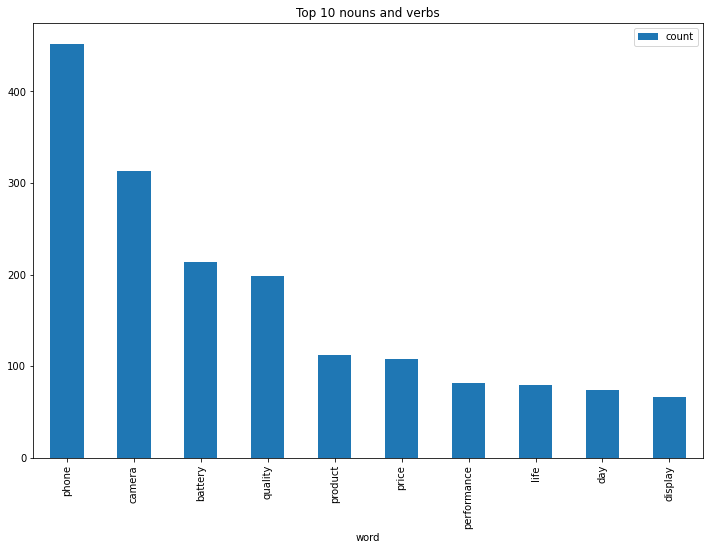

In [585]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')


# Feature Extraction for 'Key Words'

In [586]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


In [587]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


# Fetch sentiments


In [588]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [589]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

# Using NLTK's SentimentIntensityAnalyzer

In [590]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())


,Clean_Reviews
pos,937
neg,86


In [591]:
dataframe.Clean_Reviews[8]


'bloatwares oxygen best display quality amazing battery back mark camera quality best light weight slim size good deal got k k price range'

In [592]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.9442}

In [593]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,reviewing using device month performance great...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp..."
1,camera quality improve,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."
2,six month use would like say good phone price ...,"{'neg': 0.127, 'neu': 0.559, 'pos': 0.315, 'co..."
3,like battery even heavy use last day charging ...,"{'neg': 0.068, 'neu': 0.607, 'pos': 0.325, 'co..."
4,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."


In [594]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,reviewing using device month performance great...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.7906
1,camera quality improve,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404
2,six month use would like say good phone price ...,"{'neg': 0.127, 'neu': 0.559, 'pos': 0.315, 'co...",0.9153
3,like battery even heavy use last day charging ...,"{'neg': 0.068, 'neu': 0.607, 'pos': 0.325, 'co...",0.7367
4,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404


In [595]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,reviewing using device month performance great...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.7906,Positive
1,camera quality improve,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive
2,six month use would like say good phone price ...,"{'neg': 0.127, 'neu': 0.559, 'pos': 0.315, 'co...",0.9153,Positive
3,like battery even heavy use last day charging ...,"{'neg': 0.068, 'neu': 0.607, 'pos': 0.325, 'co...",0.7367,Positive
4,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
...,...,...,...,...
1018,may hang day camera quality also good pro fing...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404,Positive
1019,like product much using day much light weight ...,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.8074,Positive
1020,nice phone,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
1021,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive


In [596]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,814
1,Neutral,129
0,Negative,80


<AxesSubplot:xlabel='sentiment', ylabel='count'>

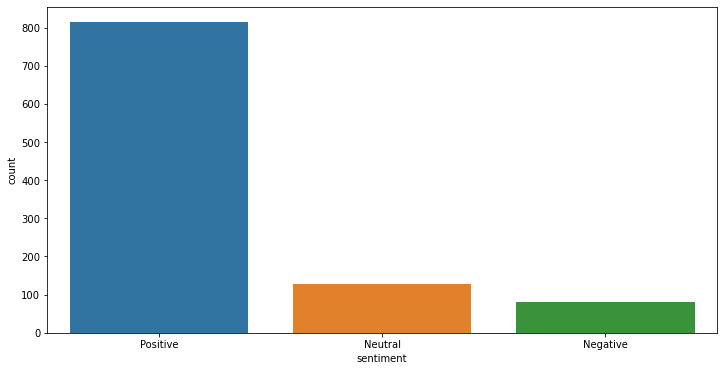

In [597]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

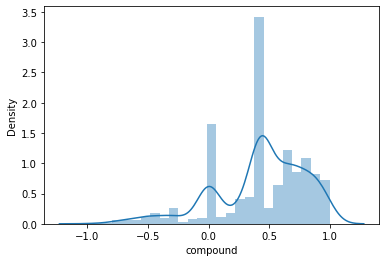

In [598]:
sns.distplot(df['compound'])


In [599]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,reviewing using device month performance great...,19
1,camera quality improve,3
2,six month use would like say good phone price ...,54
3,like battery even heavy use last day charging ...,22
4,good product,2


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

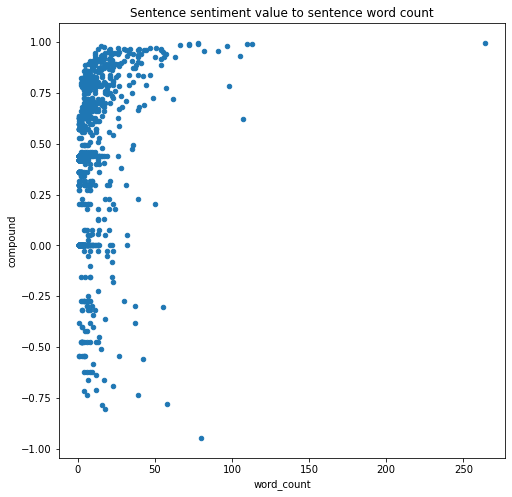

In [600]:
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')


# Using TextBlob

In [601]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,957
neg,66


In [602]:
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

In [603]:
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

In [604]:
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ...",0.550000,0.566667
1,camera quality improve,Camera quality improve,0.000000,0.000000
2,six month use would like say good phone price ...,After the six months of use i would like to sa...,0.565278,0.328472
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ...",0.295754,-0.085238
4,good product,Good product,0.600000,0.700000


Text(0, 0.5, 'Subjectivity')

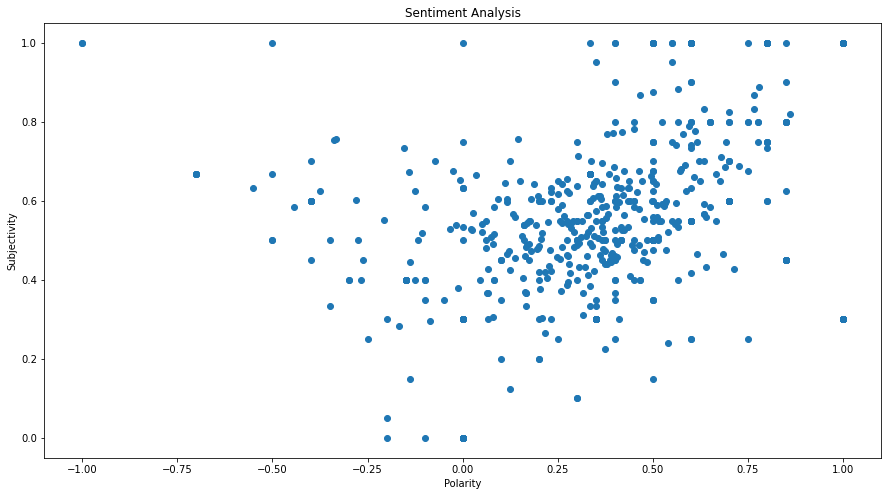

In [605]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')


In [606]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,reviewing using device month performance great...,"So, I am reviewing it after using this device ...",0.550000,0.566667,pos
1,camera quality improve,Camera quality improve,0.000000,0.000000,pos
2,six month use would like say good phone price ...,After the six months of use i would like to sa...,0.565278,0.328472,pos
3,like battery even heavy use last day charging ...,"Like: Battery even after heavy use, lasts for ...",0.295754,-0.085238,pos
4,good product,Good product,0.600000,0.700000,pos


(-0.5, 2799.5, 2399.5, -0.5)

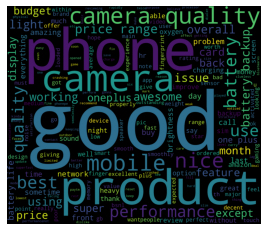

In [607]:
allWords_ = ' '.join([review for review in dataframe[:100]['Clean_Reviews']])
f, axes = plt.subplots()
wordcloud= WordCloud(
        background_color = 'black',
        width = 2800,
        height =2400).generate(allWords_)
plt.imshow(wordcloud)
plt.axis('off')

In [608]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Most common words in positive Review

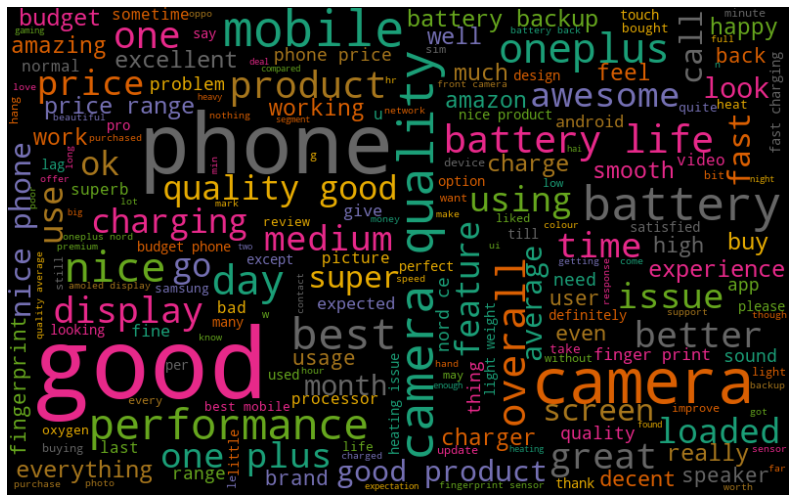

In [609]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# Most common words in negative Review

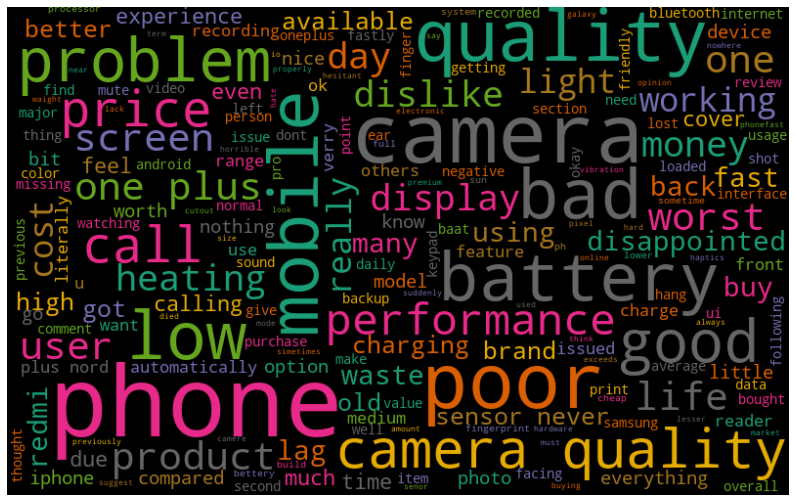

In [610]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)